In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
ksi_df = pd.read_csv('Data/KSI.csv')
hazardous_df = pd.read_csv('Data/Hazardous_Driving_Areas_Toronto.csv')
ksi_collapse = pd.read_csv('Data/KSI_Collapse_Count.csv', index_col = 0)

In [21]:
pd.set_option('display.max_columns', None)

In [10]:
ksi_df.head(1)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1


In [12]:
hazardous_df.head(1)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version
0,f25eun8,"POLYGON((-73.65234375 45.6948852539063, -73.65...",45.695,-73.652,45.696,-73.651,POINT(-73.65123 45.6955),45.696,-73.651,NaN,NaN,NaN,Canada,CA,0.005,7,2022-02-02,5.1


In [36]:
# ksi_collapse was rounded to 2 decimal places ONLY to create Hazardous_KSI_Merge_round2.csv
# it was rounded to 3 decimal places to create Hazardous_KSI_Merge.csv

ksi_collapse = round(ksi_collapse, 3)
ksi_collapse = round(ksi_collapse, 2)

In [37]:
# this was only run to create Hazardous_KSI_Merge_round2.csv
# there is also a Hazardous_KSI_Merge.csv where ONLY ksi_collapse was rounded to 3 decimal places

hazardous_df = round(hazardous_df, 2)

In [38]:
hazardous_merge = hazardous_df.merge(ksi_collapse, left_on = ['Latitude', 'Longitude'], right_on = ['LATITUDE', 'LONGITUDE'], how = 'inner')

In [39]:
hazardous_merge

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
0,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.66,-79.40,43.66,-79.40,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1,43.66,-79.40,1
1,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.66,-79.40,43.66,-79.40,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1,43.66,-79.40,1
2,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.66,-79.40,43.66,-79.40,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1,43.66,-79.40,1
3,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.66,-79.40,43.66,-79.40,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1,43.66,-79.40,1
4,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.66,-79.40,43.66,-79.40,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1,43.66,-79.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33772,dpz8v01,"POLYGON((-79.2320251464844 43.7255859375, -79....",43.73,-79.23,43.73,-79.23,POINT(-79.23167 43.72586),43.73,-79.23,Toronto,NaN,Ontario,Canada,CA-ON,0.01,5,2022-02-02,5.1,43.73,-79.23,2
33773,dpz8v01,"POLYGON((-79.2320251464844 43.7255859375, -79....",43.73,-79.23,43.73,-79.23,POINT(-79.23167 43.72586),43.73,-79.23,Toronto,NaN,Ontario,Canada,CA-ON,0.01,5,2022-02-02,5.1,43.73,-79.23,1
33774,dpz8v01,"POLYGON((-79.2320251464844 43.7255859375, -79....",43.73,-79.23,43.73,-79.23,POINT(-79.23167 43.72586),43.73,-79.23,Toronto,NaN,Ontario,Canada,CA-ON,0.01,5,2022-02-02,5.1,43.73,-79.23,1
33775,dpz8v01,"POLYGON((-79.2320251464844 43.7255859375, -79....",43.73,-79.23,43.73,-79.23,POINT(-79.23167 43.72586),43.73,-79.23,Toronto,NaN,Ontario,Canada,CA-ON,0.01,5,2022-02-02,5.1,43.73,-79.23,1


In [9]:
hazardous_merge.sort_values(by = 'SeverityScore', ascending = False)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
428,dpz881k,"POLYGON((-79.4476318359375 43.6885070800781, -...",43.689,-79.448,43.690,-79.446,POINT(-79.44747 43.68892),43.689,-79.447,Toronto,NaN,Ontario,Canada,CA-ON,0.257,134,2022-02-02,5.1,43.689,-79.447,1
427,dpz881k,"POLYGON((-79.4476318359375 43.6885070800781, -...",43.689,-79.448,43.690,-79.446,POINT(-79.44747 43.68892),43.689,-79.447,Toronto,NaN,Ontario,Canada,CA-ON,0.257,134,2022-02-02,5.1,43.689,-79.447,1
866,dpz2yrr,"POLYGON((-79.5204162597656 43.7654113769531, -...",43.765,-79.520,43.767,-79.519,POINT(-79.5197 43.76592),43.766,-79.520,Toronto,NaN,Ontario,Canada,CA-ON,0.237,83,2022-02-02,5.1,43.766,-79.520,1
108,dpz8uns,"POLYGON((-79.2718505859375 43.7612915039062, -...",43.761,-79.272,43.763,-79.270,POINT(-79.27157 43.76173),43.762,-79.272,Toronto,NaN,Ontario,Canada,CA-ON,0.231,31,2022-02-02,5.1,43.762,-79.272,1
553,dpz2tg7,"POLYGON((-79.5478820800781 43.6994934082031, -...",43.699,-79.548,43.701,-79.547,POINT(-79.54776 43.69958),43.700,-79.548,Toronto,NaN,Ontario,Canada,CA-ON,0.227,114,2022-02-02,5.1,43.700,-79.548,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,dpz820h,"POLYGON((-79.4476318359375 43.6376953125, -79....",43.638,-79.448,43.639,-79.446,POINT(-79.44704 43.63808),43.638,-79.447,Toronto,NaN,Ontario,Canada,CA-ON,0.001,7,2022-02-02,5.1,43.638,-79.447,1
1265,dpz820h,"POLYGON((-79.4476318359375 43.6376953125, -79....",43.638,-79.448,43.639,-79.446,POINT(-79.44704 43.63808),43.638,-79.447,Toronto,NaN,Ontario,Canada,CA-ON,0.001,7,2022-02-02,5.1,43.638,-79.447,1
325,dpz8660,"POLYGON((-79.354248046875 43.648681640625, -79...",43.649,-79.354,43.650,-79.353,POINT(-79.35345 43.649),43.649,-79.353,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.649,-79.353,1
172,dpz8d0e,"POLYGON((-79.3611145019531 43.6843872070312, -...",43.684,-79.361,43.686,-79.360,POINT(-79.36099 43.68545),43.685,-79.361,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.685,-79.361,1


In [40]:
hazardous_merge.sort_values(by = 'COUNT', ascending = False)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
25274,dpz2tg6,"POLYGON((-79.5492553710938 43.6994934082031, -...",43.70,-79.55,43.70,-79.55,POINT(-79.54815 43.70024),43.70,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.02,11,2022-02-02,5.1,43.70,-79.55,6
3738,dpz90v0,"POLYGON((-79.420166015625 43.7969970703125, -7...",43.80,-79.42,43.80,-79.42,POINT(-79.4197 43.79796),43.80,-79.42,Toronto,NaN,Ontario,Canada,CA-ON,0.04,48,2022-02-02,5.1,43.80,-79.42,6
25283,dpz2tu1,"POLYGON((-79.5506286621094 43.70361328125, -79...",43.70,-79.55,43.70,-79.55,POINT(-79.55002 43.70434),43.70,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.02,9,2022-02-02,5.1,43.70,-79.55,6
25238,dpz2tfu,"POLYGON((-79.5465087890625 43.6967468261719, -...",43.70,-79.55,43.70,-79.54,POINT(-79.54609 43.69727),43.70,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.02,9,2022-02-02,5.1,43.70,-79.55,6
25247,dpz2tfg,"POLYGON((-79.5478820800781 43.6967468261719, -...",43.70,-79.55,43.70,-79.55,POINT(-79.5468 43.69714),43.70,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.01,20,2022-02-02,5.1,43.70,-79.55,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,dpz834z,"POLYGON((-79.3995666503906 43.6528015136719, -...",43.65,-79.40,43.65,-79.40,POINT(-79.39823 43.65336),43.65,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.01,3,2022-02-02,5.1,43.65,-79.40,1
11819,dpz834z,"POLYGON((-79.3995666503906 43.6528015136719, -...",43.65,-79.40,43.65,-79.40,POINT(-79.39823 43.65336),43.65,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.01,3,2022-02-02,5.1,43.65,-79.40,1
11818,dpz834z,"POLYGON((-79.3995666503906 43.6528015136719, -...",43.65,-79.40,43.65,-79.40,POINT(-79.39823 43.65336),43.65,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.01,3,2022-02-02,5.1,43.65,-79.40,1
11817,dpz834z,"POLYGON((-79.3995666503906 43.6528015136719, -...",43.65,-79.40,43.65,-79.40,POINT(-79.39823 43.65336),43.65,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.01,3,2022-02-02,5.1,43.65,-79.40,1


In [42]:
hazardous_merge.to_csv('Hazardous_KSI_Merge_round2.csv')

<AxesSubplot:xlabel='COUNT', ylabel='IncidentsTotal'>

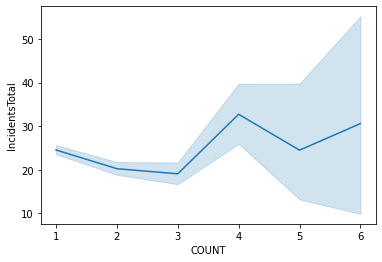

In [48]:
sns.lineplot(data = hazardous_merge, y = 'IncidentsTotal', x = 'COUNT')